In [1]:
import pandas as pd

In [2]:
playlist_df = pd.read_csv('playlists.csv')
playlist_df.head()  # muestra las primeras filas del DataFrame

df_copy = playlist_df.copy()

In [3]:
playlist_df.describe()  # proporciona estadísticas descriptivas para las columnas numéricas

,pid,num_tracks,num_albums,num_followers,modified_at,num_edits,duration_ms,num_artists
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,499999.500000,66.346428,49.597278,2.597746,1.476279e+09,17.655902,1.557968e+07,38.088211
std,288675.278932,53.669358,39.961064,128.851145,3.666992e+07,20.643254,1.285643e+07,30.282901
min,0.000000,5.000000,2.000000,1.000000,1.271376e+09,1.000000,9.753800e+04,3.000000
25%,249999.750000,26.000000,20.000000,1.000000,1.458950e+09,5.000000,5.995383e+06,16.000000
50%,499999.500000,49.000000,37.000000,1.000000,1.490227e+09,10.000000,1.142244e+07,29.000000
75%,749999.250000,92.000000,68.000000,1.000000,1.505434e+09,22.000000,2.143369e+07,52.000000
max,999999.000000,376.000000,244.000000,71643.000000,1.509494e+09,201.000000,6.350738e+08,238.000000


In [4]:
playlist_df.info()  # muestra información sobre el DataFrame, incluyendo los tipos de datos y la cantidad de valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   pid            1000000 non-null  int64 
 1   name           999989 non-null   object
 2   description    18758 non-null    object
 3   num_tracks     1000000 non-null  int64 
 4   num_albums     1000000 non-null  int64 
 5   num_followers  1000000 non-null  int64 
 6   collaborative  1000000 non-null  bool  
 7   modified_at    1000000 non-null  int64 
 8   num_edits      1000000 non-null  int64 
 9   duration_ms    1000000 non-null  int64 
 10  num_artists    1000000 non-null  int64 
dtypes: bool(1), int64(8), object(2)
memory usage: 77.2+ MB


In [5]:
playlist_df.iloc[:,1:].describe()

,num_tracks,num_albums,num_followers,modified_at,num_edits,duration_ms,num_artists
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,66.346428,49.597278,2.597746,1.476279e+09,17.655902,1.557968e+07,38.088211
std,53.669358,39.961064,128.851145,3.666992e+07,20.643254,1.285643e+07,30.282901
min,5.000000,2.000000,1.000000,1.271376e+09,1.000000,9.753800e+04,3.000000
25%,26.000000,20.000000,1.000000,1.458950e+09,5.000000,5.995383e+06,16.000000
50%,49.000000,37.000000,1.000000,1.490227e+09,10.000000,1.142244e+07,29.000000
75%,92.000000,68.000000,1.000000,1.505434e+09,22.000000,2.143369e+07,52.000000
max,376.000000,244.000000,71643.000000,1.509494e+09,201.000000,6.350738e+08,238.000000


In [6]:
playlist_df['playlist'] = playlist_df['name'] + ' - ' + playlist_df['description'].fillna('')
playlist_df.head()

,pid,name,description,num_tracks,num_albums,num_followers,collaborative,modified_at,num_edits,duration_ms,num_artists,playlist
0,0,Throwbacks,NaN,52,47,1,False,1493424000,6,11532414,37,Throwbacks -
1,1,Awesome Playlist,NaN,39,23,1,False,1506556800,5,11656470,21,Awesome Playlist -
2,2,korean,NaN,64,51,1,False,1505692800,18,14039958,31,korean -
3,3,mat,NaN,126,107,1,False,1501027200,4,28926058,86,mat -
4,4,90s,NaN,17,16,2,False,1401667200,7,4335282,16,90s -


In [7]:
# Popularity-based recommendation based on the number of followers
class PopularityRecommender():
    def __init__(self):
        self.train_data = None
        self.playlist_id = None
        self.popularity_recommendations = None
    
    def create(self, train_data, playlist_id):
        self.train_data = train_data
        self.playlist_id = playlist_id

        # Grouping by playlist and sorting based on number of followers
        train_data_grouped = train_data.groupby([self.playlist_id]).agg({'num_followers': 'sum'}).reset_index()
        train_data_sort = train_data_grouped.sort_values(['num_followers', self.playlist_id], ascending = [0,1])
        train_data_sort['Rank'] = train_data_sort['num_followers'].rank(ascending=0, method='first')
        self.popularity_recommendations = train_data_sort.head(10)

    def recommend(self, pid):    
        user_recommendations = self.popularity_recommendations
        user_recommendations['pid'] = pid
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        return user_recommendations

In [8]:
pr = PopularityRecommender()
pr.create(playlist_df, 'playlist')

In [9]:
# Display the top 10 popular playlists
pr.recommend(5)

,pid,playlist,num_followers,Rank
64566,5,That's What I Like -,71689,1.0
13555,5,Breaking Bad - Every song ever featured on Bre...,53519,2.0
48703,5,One Tree Hill -,46043,3.0
44683,5,My Little Pony -,31585,4.0
52266,5,"Q1 - Jack's <a href=""http://instagram.com/that...",27830,5.0
35680,5,Jack's Playlist -,23537,6.0
55437,5,Rock Hits -,22117,7.0
63740,5,TOP POP - All that pop goodness. Playlist imag...,15842,8.0
24534,5,FARRUKO -,15123,9.0
70354,5,Wiz Khalifa -,14891,10.0


In [10]:
# Find columns with null values
null_columns = playlist_df.isnull().sum()

# Display the result
print(null_columns)

pid                   0
name                 11
description      981242
num_tracks            0
num_albums            0
num_followers         0
collaborative         0
modified_at           0
num_edits             0
duration_ms           0
num_artists           0
playlist             11
dtype: int64


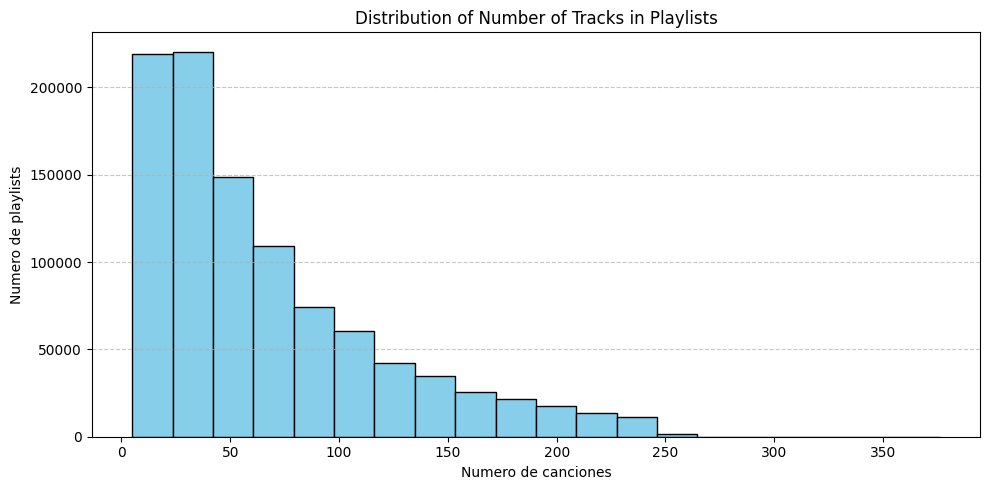

KeyError: 'collaborativa'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Histogram for number of tracks
plt.figure(figsize=(10, 5))
plt.hist(playlist_df['num_tracks'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribucion del numero de canciones en una playlist')
plt.xlabel('Numero de canciones')
plt.ylabel('Numero de playlists')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart for collaborative vs non-collaborative playlists
collab_counts = playlist_df['collaborative'].value_counts()
colors = ['lightcoral', 'lightskyblue']
labels = collab_counts.index
plt.figure(figsize=(8, 6))
plt.pie(collab_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribcion de playlists Colaborativas vs No Colaborativas')
plt.tight_layout()
plt.show()
